<a href="https://colab.research.google.com/github/alphamale126/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing the Modules and Loading the Dataset**

In [ ]:
#Importing the required packages
import pandas as pd
import numpy as np

#Import visualization packages

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the file
bike_df= pd.read_csv('/content/drive/MyDrive/SeoulBikeSharingDemandPrediction/SeoulBikeData.csv', encoding='latin')

# **Exploring the data in the given dataset**

In [ ]:
#Data in the top 5 rows 
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Data in the bottom 5 rows
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Printing the shape of the dataset
print(bike_df.shape)

(8760, 14)


In [ ]:
#Printing the attributes
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Understanding the datatype of each attribute
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
# Checking for Null values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Finding the unique values
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Analysing both categorical and numerical values in the dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Feature Description**

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY,

Type : str,
we need to convert into datetime format.


**Rented Bike Count**: Number of rented bikes per hour which our dependent variable and we need to predict that,

 Type : int.

**Hour**: The hour of the day, starting from 0-23, it is in a digital time format,

 Type : int, we need to convert it into category data type.


**Temperature(°C)**: Temperature in Celsius, 

Type : Float

**Humidity(%)**: Humidity in the air in %, 


Type : int

**Wind speed (m/s)** : Speed of the wind in m/s, 

Type : Float

**Visibility (10m)**: Visibility in m, 

Type : int

**Dew point temperature(°C)**: Temperature at the beginning of the day, 

Type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, 

Type : Float

**Rainfall(mm)**: Amount of rain in mm, 

Type : Float

**Snowfall (cm)**: Amount of snowing in cm, 

Type : Float

**Seasons**: Season of the year, 

Type : str, there are only 4 season's in data .

**Holiday**: If the day is holiday or not, 

Type: str

**Functioning Day**: If the day is a Functioning Day or not, 

Type : str

# **Looking for Duplicate and Missing values**

In [ ]:
#Count of missing values in each attribute.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can say from the above, that there are no missing values present in any attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


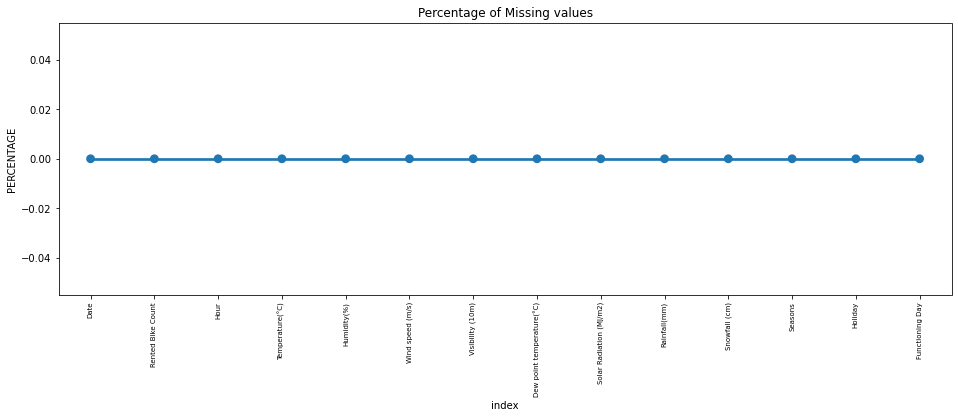

In [ ]:
#Plotting the missing values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
# Checking Duplicate Values
duplicate_values=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_values)

The number of duplicate values in the data set is =  0


From the above analysis, we can say that there are no missing or duplicate values present in the given datset.

But we can see that, some attribute names are too clumpsy to handle,
so changing the attribute names to reduce to complexity for exploring the data frequently.

# **Observations and actions to be performed**

1)**Null values/missing values**-0

2)**Date**- attribute needed to be converted into proper data type.


3)**Attributes to be converted into numeric(for modelling Purpose)**

a) Seasons

b) Holiday

c) Functioning day


4)**Attributes to be Renamed-**

Temperature(°C)

Humidity(%)

Wind speed (m/s)

Visibility (10m)

Dew point temperature(°C)

Solar Radiation (MJ/m2)

Rainfall(mm)

Snowfall (cm)

Rented Bike Count

Functioning Day

( For Spaces and as variables having units in brackets which makes it difficult to copy variable names.)

In [ ]:
# Checking the attributes
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Renaming the complex attribute names
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
# Changing The datatype of Date attribute to extract 'Month','Day',"Year". so that we can analyze the Bike rentals with respect to year, months and days.
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')

In [ ]:
# Creating new attributes 'Month','Year','Day'.
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day_name() 
bike_df['year'] =bike_df['Date'].dt.year

In [ ]:
# Creating new attribute and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_df['weekdays_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
# Checking the newly created attributes
bike_df.head(50)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,year,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
5,2017-01-12,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
6,2017-01-12,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
7,2017-01-12,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
8,2017-01-12,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
9,2017-01-12,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0


In [ ]:
# Droping 'Day', 'Date', 'Year' attributes.

bike_df.drop(['Date',"Day",'year'], axis=1 ,inplace=True)

So we converted the "date" attribute into 3 different attributes i.e "year","month","day".

The "year" attribute in our data set basically contains 2 unique numbers, the details from 2017 december to 2018 november so if i consider this as one year then we don't need the "year" attribute so we drop it.

The other attribute "day", contains the details about each day of the month, for our analysis we don't need the data of each day of each month, all  we need from the data is, if a day is a weekday or a weekend,

so we convert it into this format and drop the "day" column

In [ ]:
bike_df.head(5)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
# Value count weekdays_weekend categories
bike_df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
# Value count for Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Value count for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Value count for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [ ]:
# Value count for Month categories
bike_df['Month'].value_counts()


1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

# **Exploratory Data Analysis Of The Data Set**

## **Analysis on categorical variables**

[Text(0.5, 1.0, 'Count of Rented bikes according to Month ')]

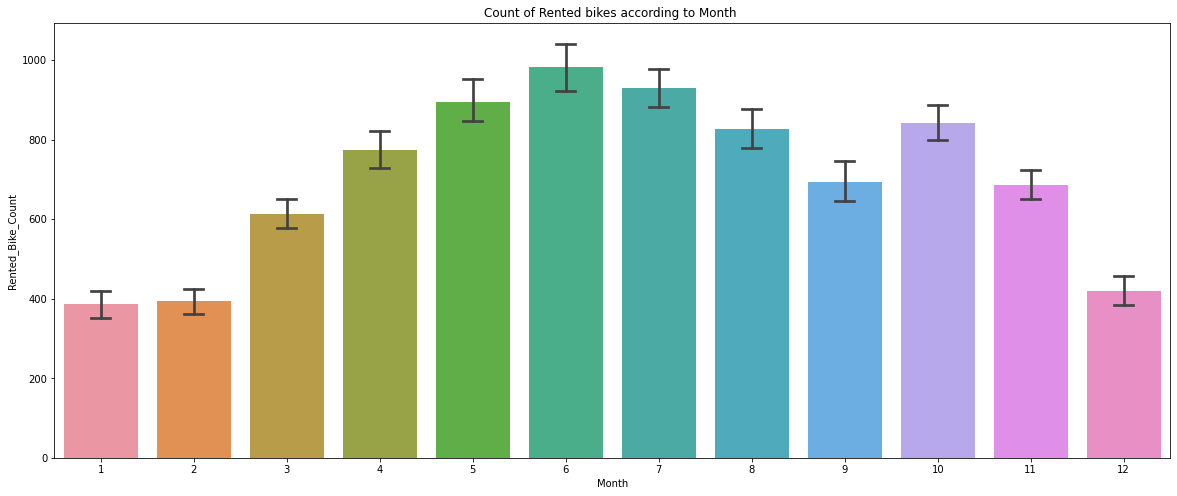

In [ ]:
#Analysis on Month attribute
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Month ')

Text(0.5, 1.0, 'Bike Rental count according to Hour in different months')

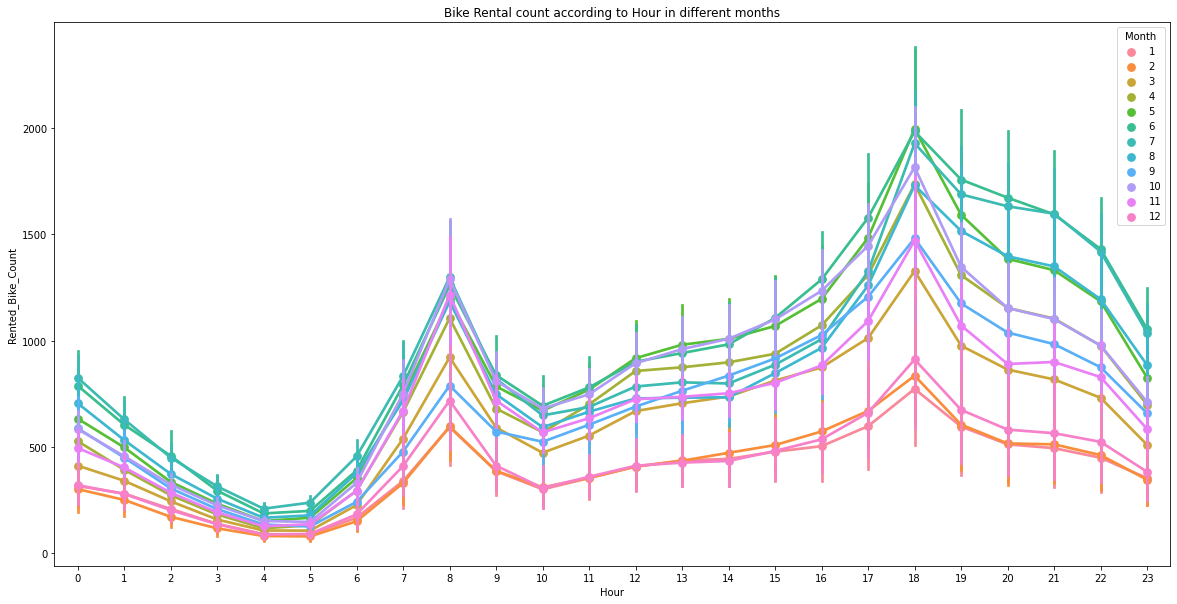

In [ ]:
# Bike Rental Count with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Month'])
plt.title("Bike Rental count according to Hour in different months")

From the above bar plot we can say that from the month 5 to 10 the demand of the rented bike is high as compared to other months and these months comes under the summer season.

Rented bike count is higher in the 6th month from the above plot.

From the pointplpot we can say that, there is sudden peak between 6/7 am to 10 am. 
Office time, College time could be the reason for this sudden peak.

Again we can see a peak between 5pm to 8 pm.
This may be due to office/college leaving time for the above people.

We can also say that,from morning 7 AM to Evening 8 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

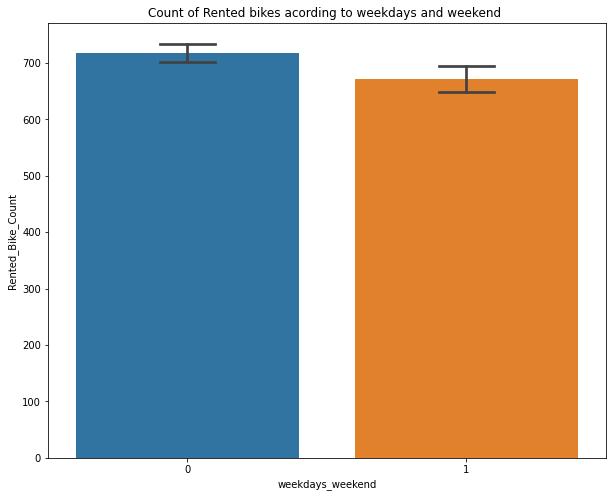

In [ ]:
#Analysis on weekdays_weekend attribute
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

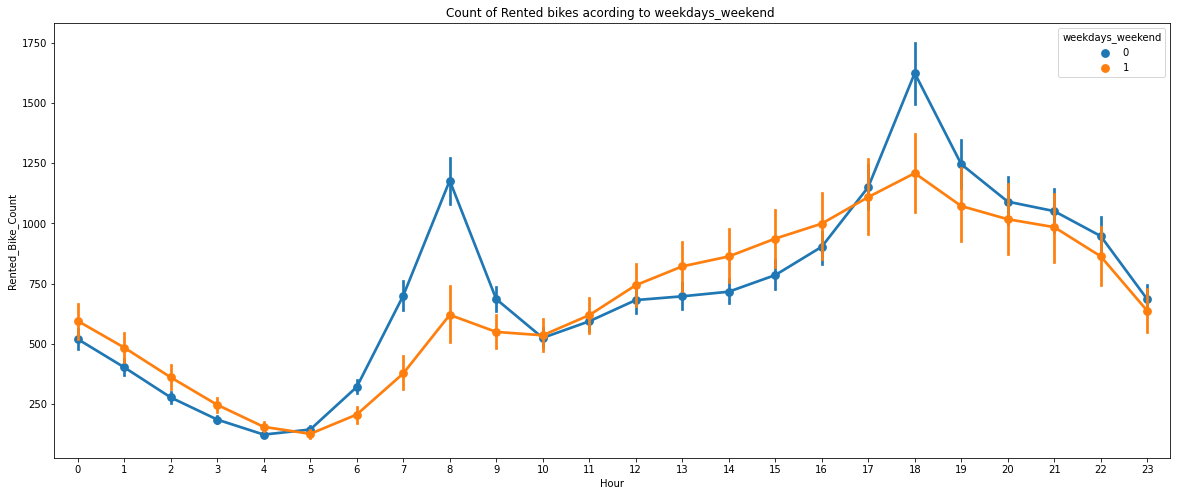

In [ ]:
# Bike Rental count with respect to Hour on weekdays_weekend
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes according to weekdays_weekend ')

From the above bar plot and point plot, we can say that the demand of the bikes is higher on weekdays than on the weekends.

This might be due to the office for employees or schools/colleged for children.

Peak Time are between 7 am-9 am and 5 pm-7 pm.

The orange line above represents the weekend days, and it shows that the demand of rented bikes are very low in the mornings but in the evening from 4 pm to 8 pm the demand slightly increases.*

[Text(0.5, 1.0, 'Count of Rented bikes according to Hour ')]

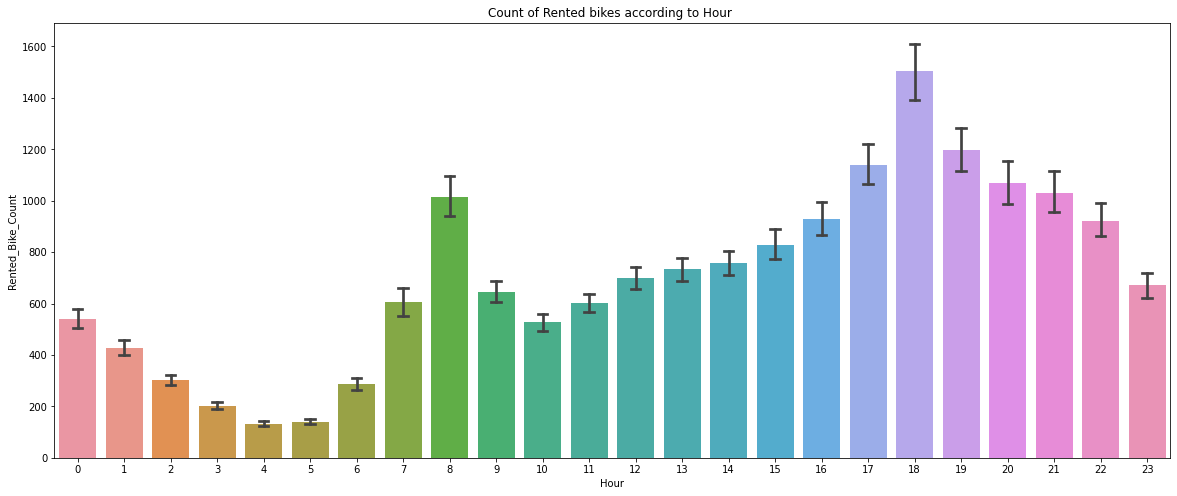

In [ ]:
#Analysis on Hour attribute
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Hour ')

From the above plot we can say that the use of rented bikes are high from 7am-9am and 5pm-8pm.

This might be due to the working hours of employees or school/college timings for students.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

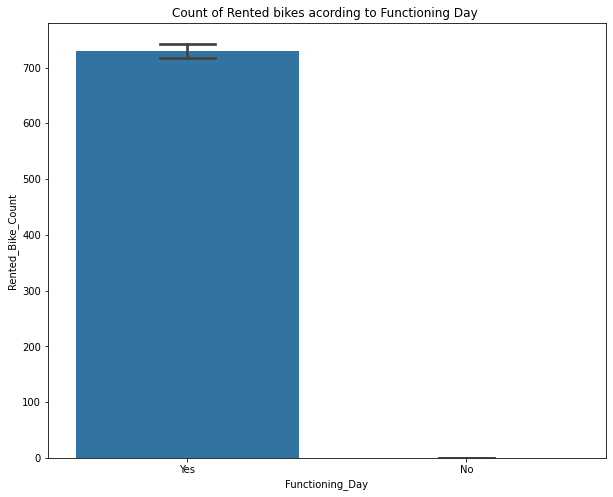

In [ ]:
#Analysis on Functioning_Day attribute
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

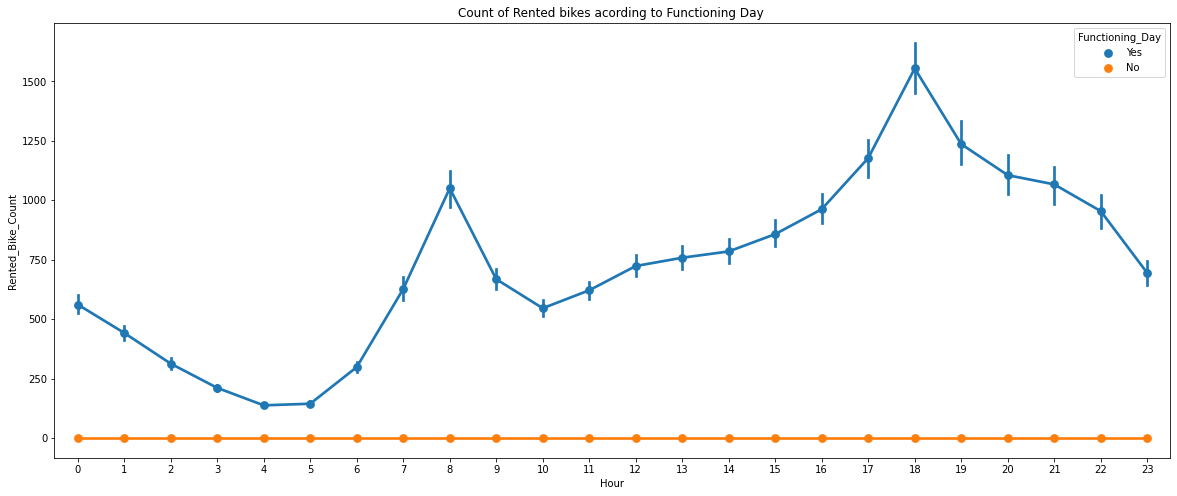

In [ ]:
# Bike Rental count with respect to Hour on Functioning_Day
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes according to Functioning Day ')

From the above bar plot and point plot which shows the use of rented bikes on functioning day and non functioning Day, we can say that,
Peoples dont use reneted bikes on non functioning days.

We can also say from the above that count of rented bikes are high between 7am-9am and 5pm-7pm

[Text(0.5, 1.0, 'Count of Rented bikes according to Seasons ')]

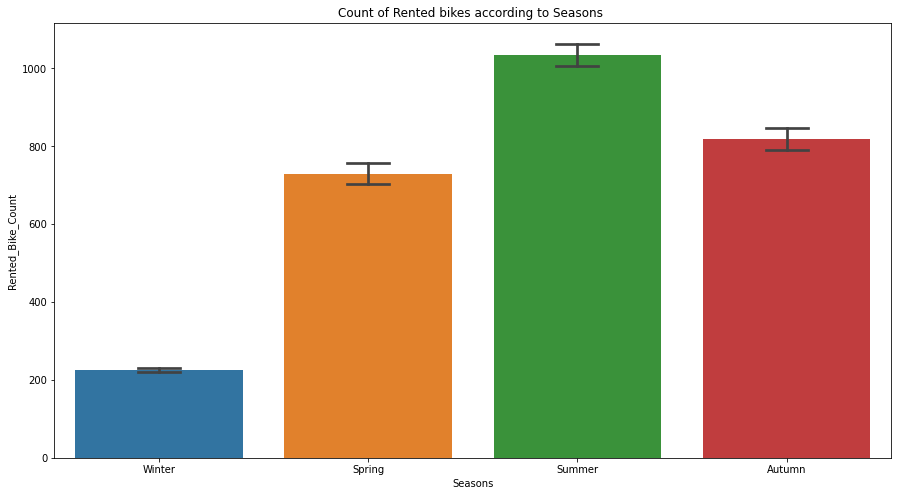

In [ ]:
#Analysis on Season attribute
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes according to seasons ')]

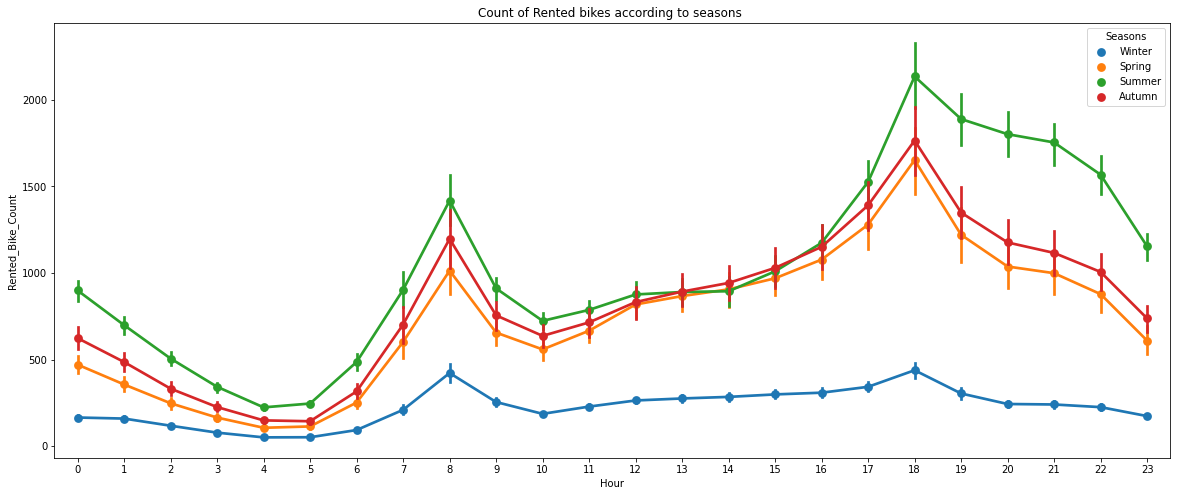

In [ ]:
# Bike Rental count with respect to Hour on different Seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes according to seasons ')

From the above bar plot and point plot which shows the use of rented bikes in four different seasons, we can say that,

In the summer season, use of rented bikes is high and peak time is between 7am-9am and 5pm-7pm.

In the winter season, use of rented bikes is very low, which might be due to the rains and unfavourable weather conditions.

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday ')]

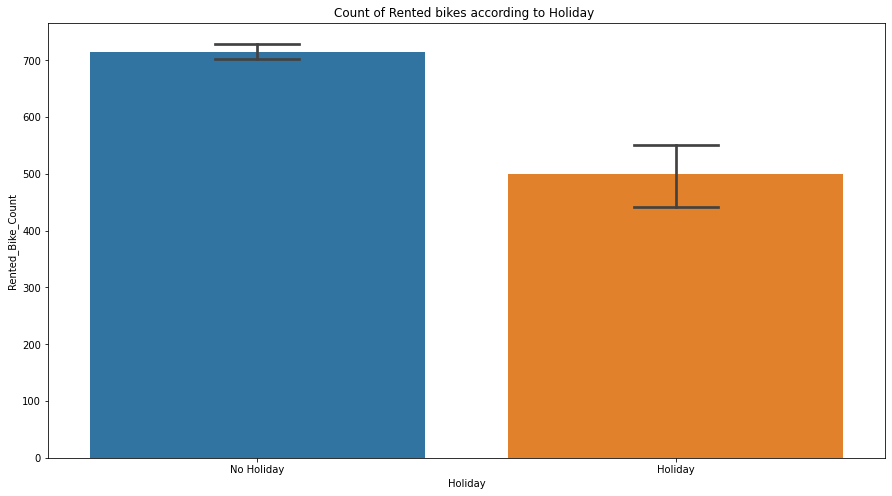

In [ ]:
#Analysis on Holiday attribute
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday ')]

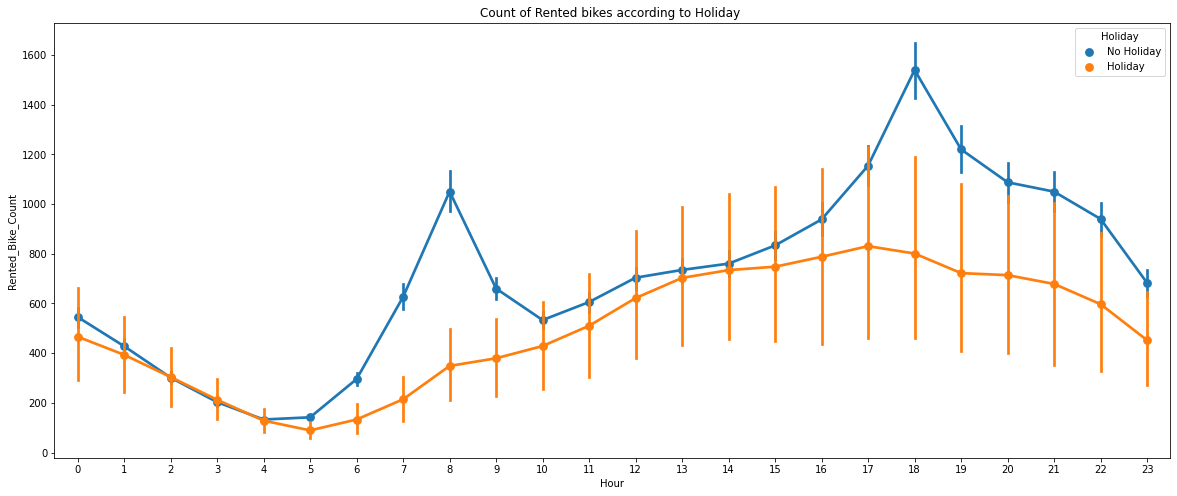

In [ ]:
# Bike Rental count with respect to Hour on Holiday
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday ')

From the above bar plot and point plot which shows the use of rented bike in a holiday, we can say that,

Use of Rented bikes is high on No Holidays than on Holidays and the peak timings are between 7am-9am and 5pm-9pm.

We can also say that on Holiday people uses the rented bike from 2pm-7pm